In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employees-performance-for-hr-analytics/Uncleaned_employees_final_dataset (1).csv


In [2]:
emp=pd.read_csv("/kaggle/input/employees-performance-for-hr-analytics/Uncleaned_employees_final_dataset (1).csv")
emp

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17413,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17414,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17415,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

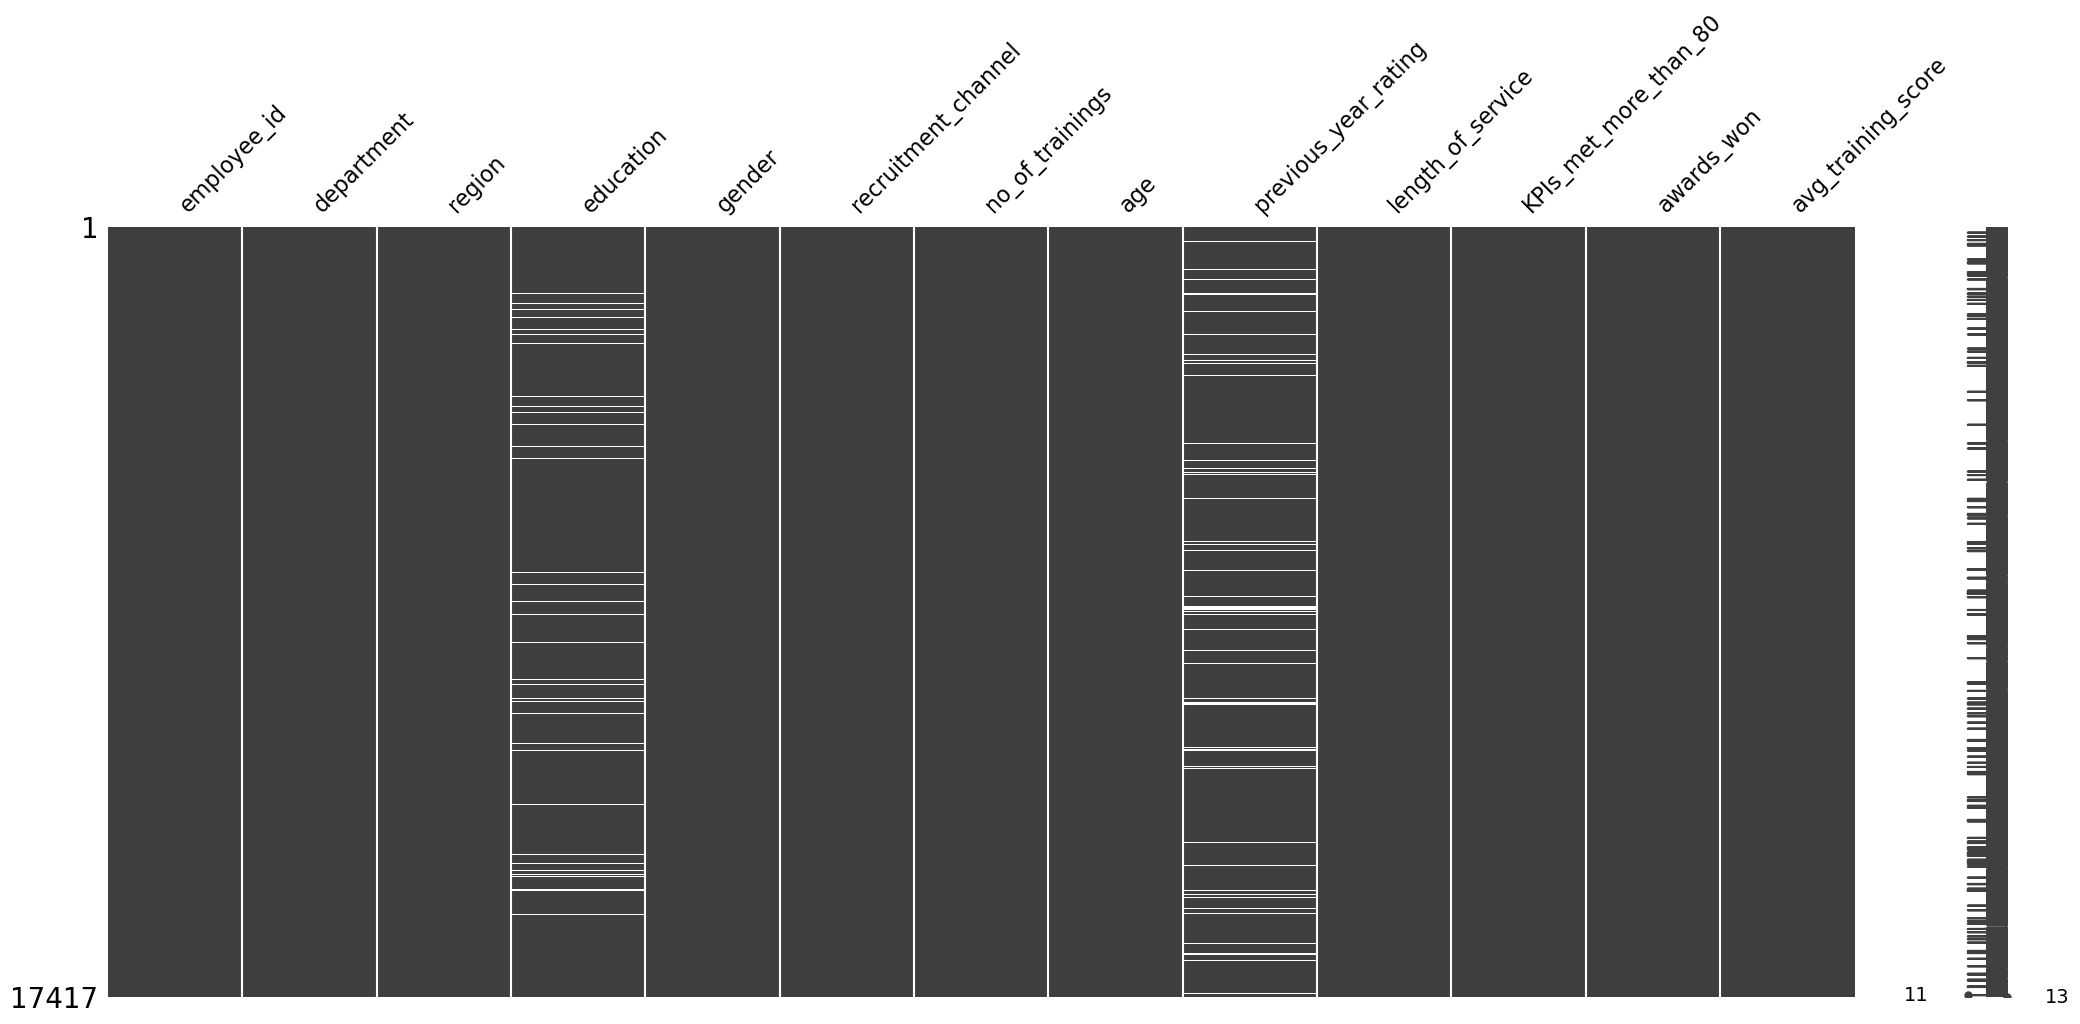

In [3]:
import missingno as msno   # check for missing values
msno.matrix(emp)

# **EDA**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Display the number of rows and columns
print("Number of rows:", emp.shape[0])
print("Number of columns:", emp.shape[1])

# Check data types and missing values
print("\nData types:")
print(emp.dtypes)

print("\nMissing values:")
print(emp.isnull().sum())


Number of rows: 17417
Number of columns: 13

Data types:
employee_id                int64
department                object
region                    object
education                 object
gender                    object
recruitment_channel       object
no_of_trainings            int64
age                        int64
previous_year_rating     float64
length_of_service          int64
KPIs_met_more_than_80      int64
awards_won                 int64
avg_training_score         int64
dtype: object

Missing values:
employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64


In [5]:
emp.drop_duplicates(inplace=True)


# **Distribution of numeric features**

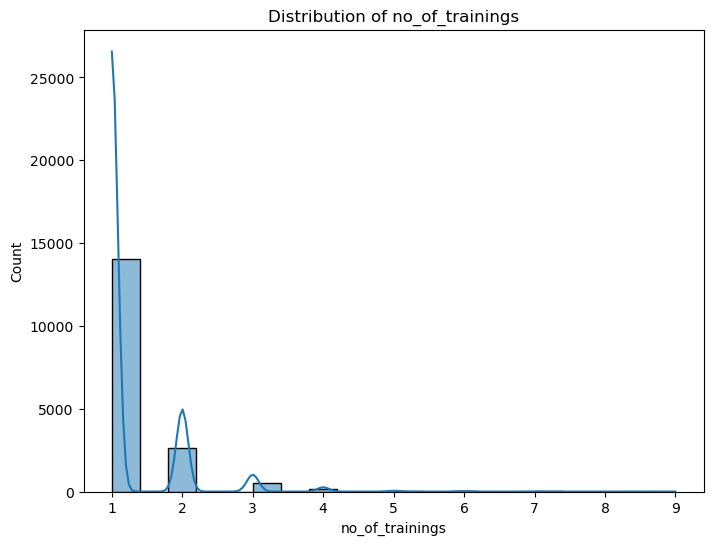

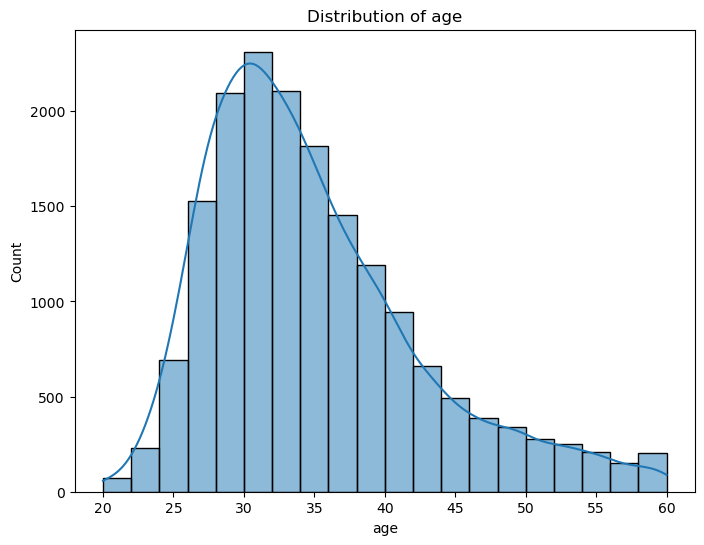

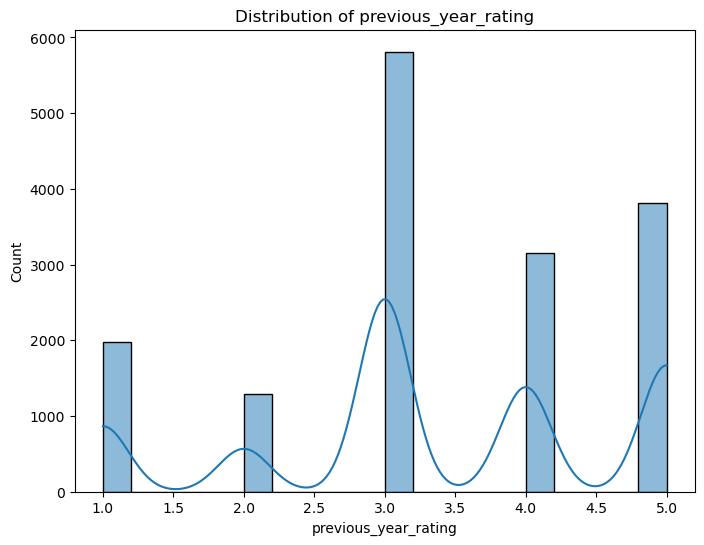

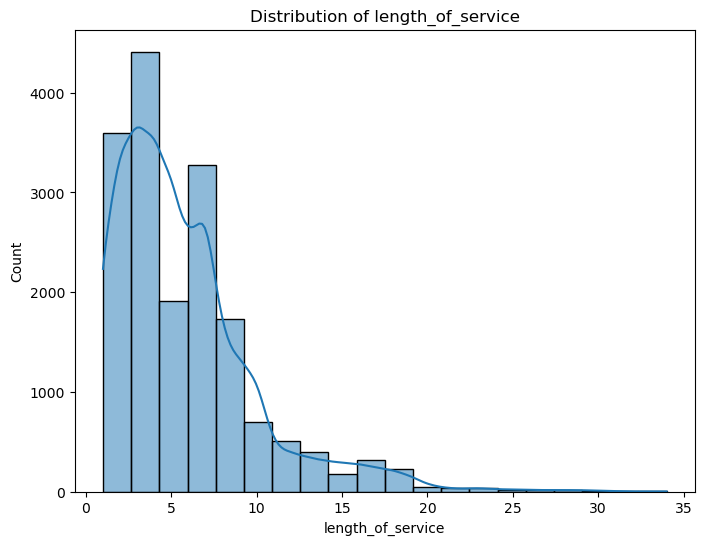

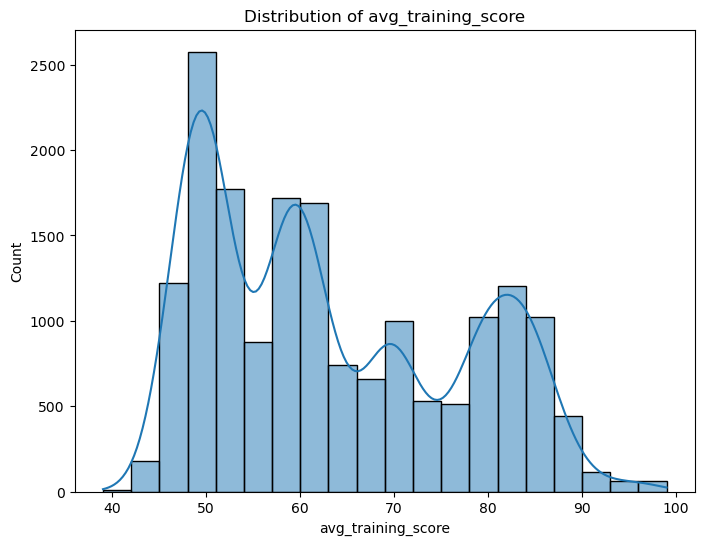

In [6]:
numeric_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']

for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(emp[feature].dropna(), kde=True, bins=20)
    plt.title(f"Distribution of {feature}")
    plt.show()


# **Categorical features analysis:**

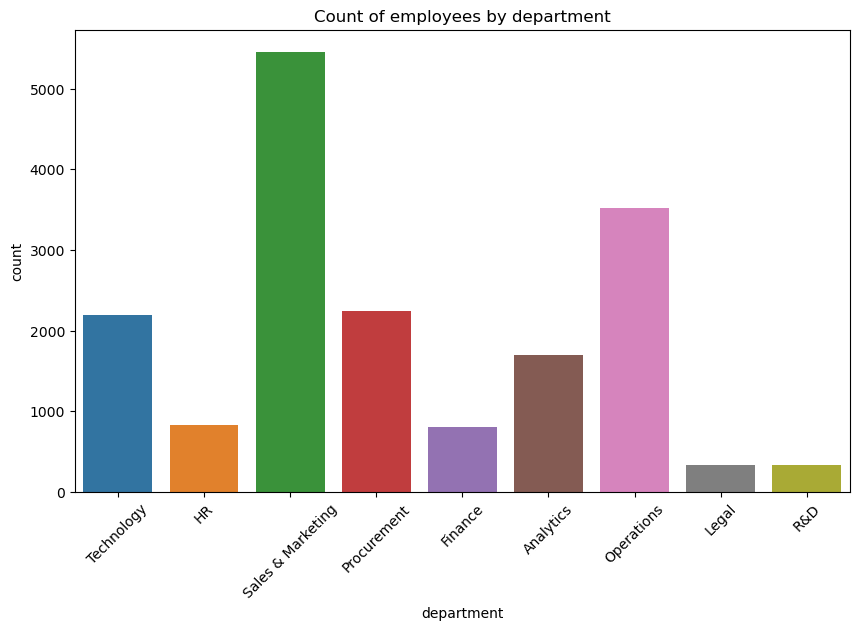

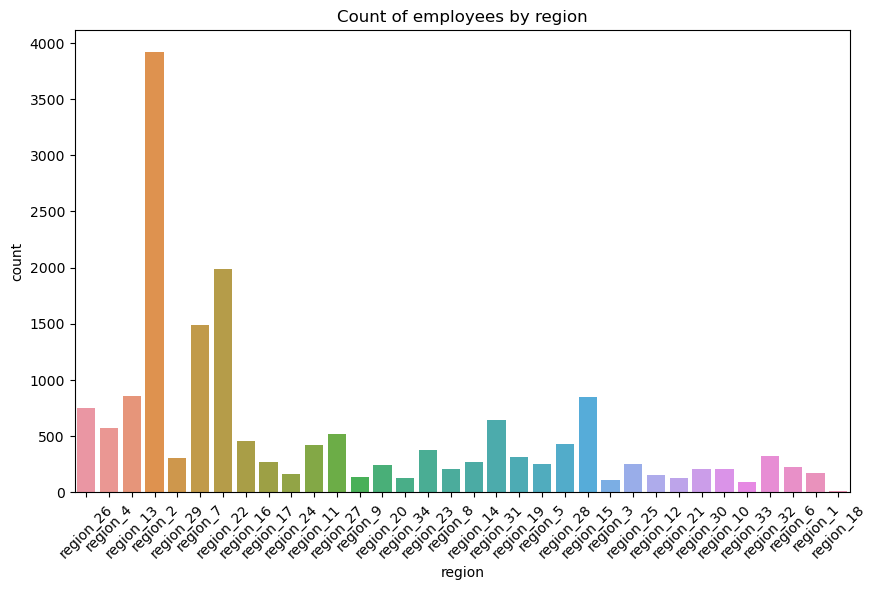

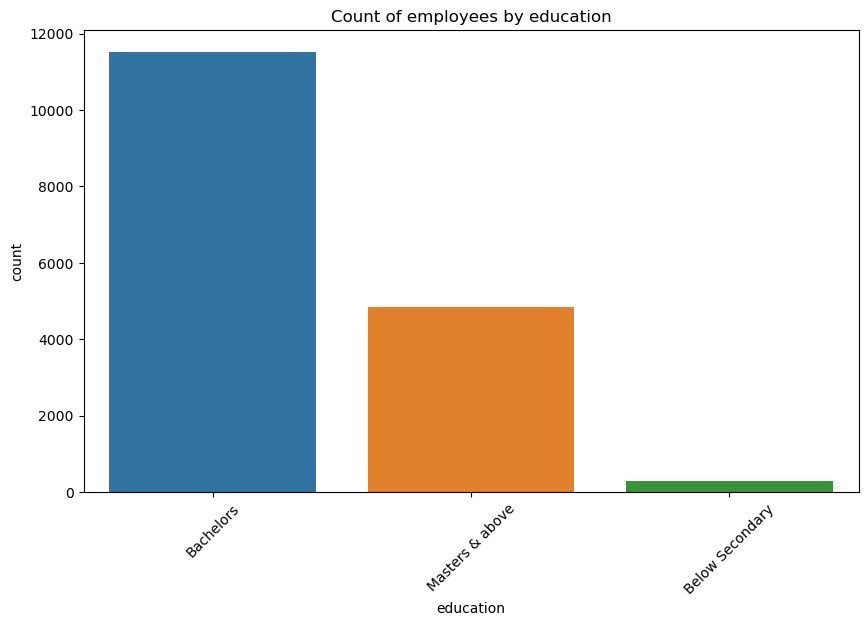

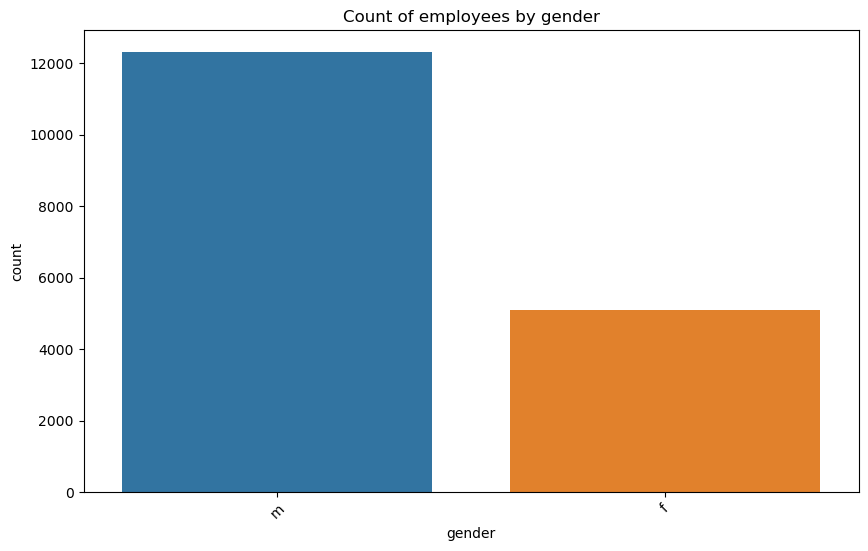

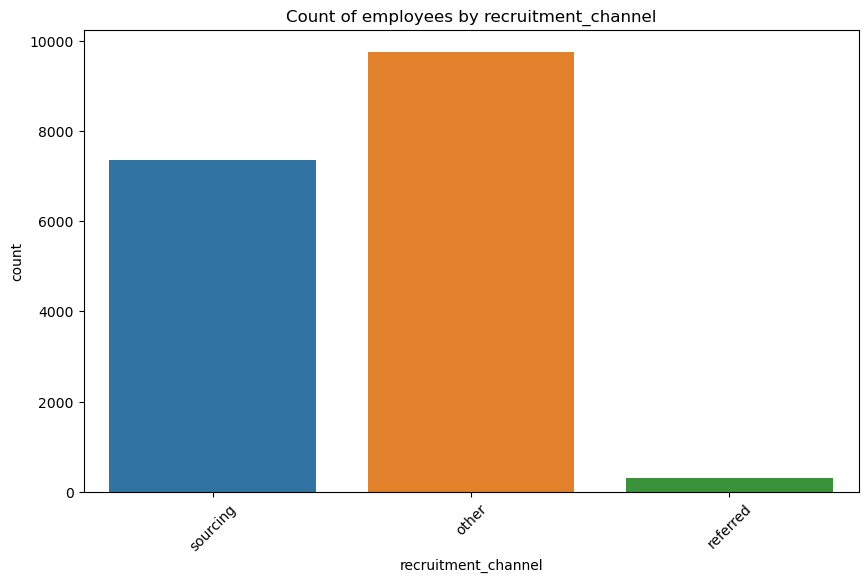

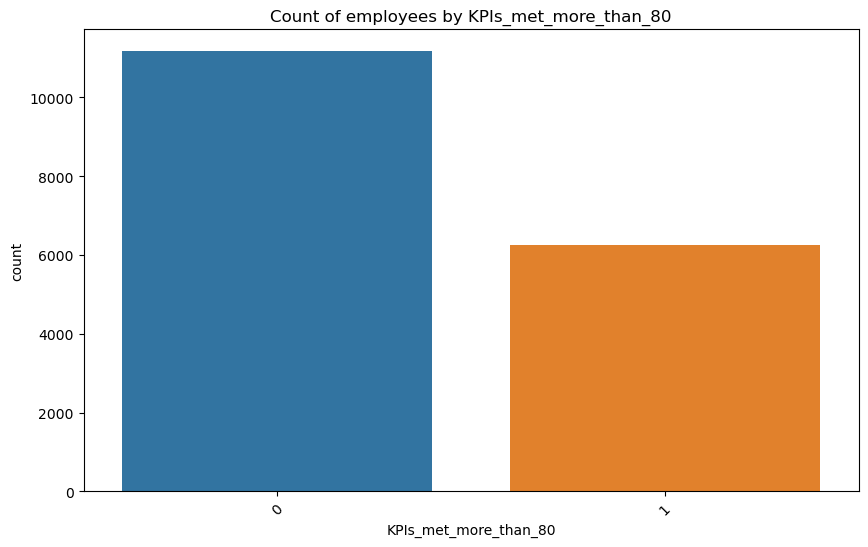

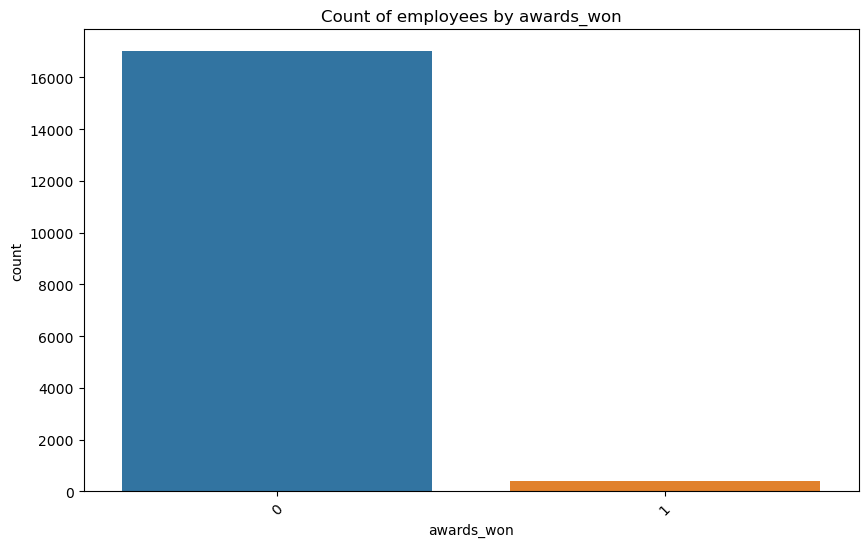

In [7]:
categorical_features = ['department', 'region', 'education', 'gender', 'recruitment_channel', 'KPIs_met_more_than_80', 'awards_won']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=emp)
    plt.title(f"Count of employees by {feature}")
    plt.xticks(rotation=45)
    plt.show()


# **Correlation study**

/tmp/ipykernel_20/3374300983.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(emp.corr(), annot=True, cmap='coolwarm', fmt='.2f')


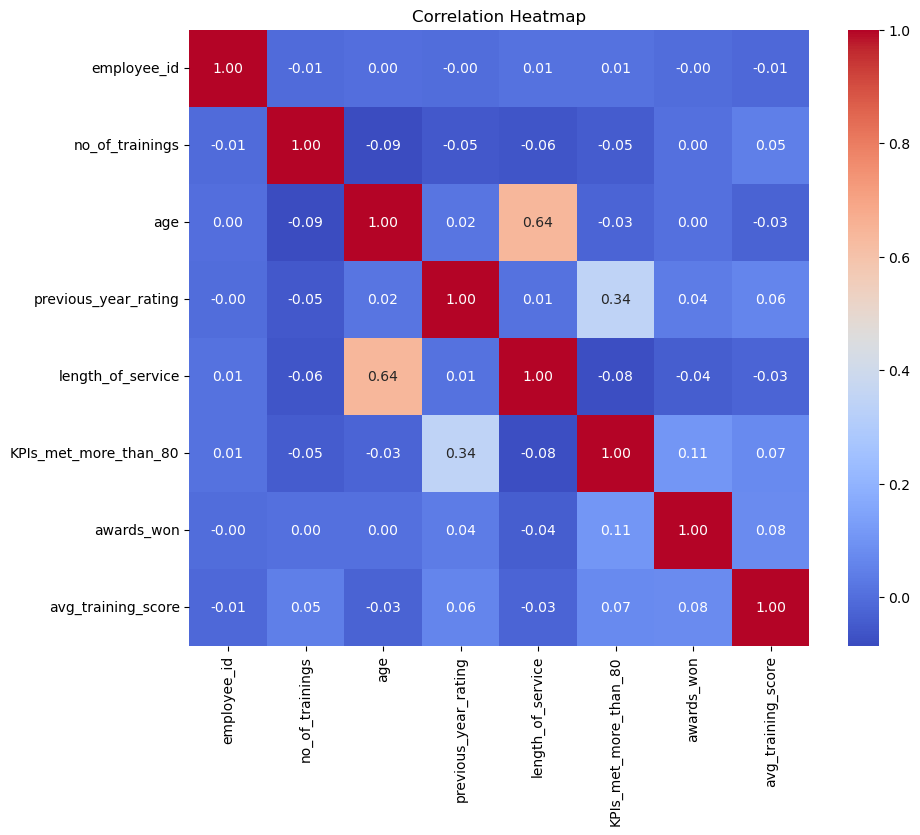

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(emp.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


# **performance study and rank the employees**

Let's assume the following weights for each column:

> recruitment_channel: 5 (high weight because it may impact the quality of hires)

> no_of_trainings: -2 (negative weight as excessive training may not always indicate good performance)

> age: 3 (higher age may imply more experience and maturity)

> previous_year_rating: 4 (previous year performance rating is crucial for overall assessment)

> length_of_service: 2 (longer service may indicate loyalty and commitment)

> KPIs_met_more_than_80: 5 (high weight because meeting KPIs is important for good performance)

> awards_won: 4 (awards won reflect recognition and excellence)

> avg_training_score: 3 (average training score contributes to overall skills and knowledge)

In [9]:
import pandas as pd

# Load the dataset
emp = pd.read_csv("/kaggle/input/employees-performance-for-hr-analytics/Uncleaned_employees_final_dataset (1).csv")

# Display the first few rows to get an overview of the data
print(emp.head())


   employee_id         department     region  education gender  \
0         8724         Technology  region_26  Bachelors      m   
1        74430                 HR   region_4  Bachelors      f   
2        72255  Sales & Marketing  region_13  Bachelors      m   
3        38562        Procurement   region_2  Bachelors      f   
4        64486            Finance  region_29  Bachelors      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met_more_than_80  awards_won  avg_training_score  
0                  1                      1           0                  77  
1                  5            

In [10]:
# Handling missing values by filling NaN in 'previous_year_rating' with the mean
emp['previous_year_rating'].fillna(emp['previous_year_rating'].mean(), inplace=True)

# Convert categorical variables to dummy variables
categorical_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']
emp_encoded = pd.get_dummies(emp, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataset
print(emp_encoded.head())


   employee_id  no_of_trainings  age  previous_year_rating  length_of_service  \
0         8724                1   24              3.345459                  1   
1        74430                1   31              3.000000                  5   
2        72255                1   31              1.000000                  4   
3        38562                3   31              2.000000                  9   
4        64486                1   30              4.000000                  7   

   KPIs_met_more_than_80  awards_won  avg_training_score  department_Finance  \
0                      1           0                  77                   0   
1                      0           0                  51                   0   
2                      0           0                  47                   0   
3                      0           0                  65                   0   
4                      0           0                  61                   1   

   department_HR  ...  region_re

In [11]:
# Define a performance metric (example: avg_training_score) and calculate it for each employee
emp_encoded['performance_metric'] = emp_encoded['avg_training_score']

# Display the first few rows with the performance metric
print(emp_encoded[['employee_id', 'performance_metric']].head())


   employee_id  performance_metric
0         8724                  77
1        74430                  51
2        72255                  47
3        38562                  65
4        64486                  61


In [12]:
# Sort employees based on the performance metric in descending order (highest to lowest)
emp_ranked = emp_encoded.sort_values(by='performance_metric', ascending=False)

# Display the ranked employees
print(emp_ranked[['employee_id', 'performance_metric']].head(10))


       employee_id  performance_metric
10092        15060                  99
11189        70209                  99
3384         48968                  99
1904         27916                  99
3847         23629                  99
3194         61090                  99
3506         44692                  99
3973         29021                  99
3005         49203                  99
4583         41351                  99


# **Visualisation of performance metrics**

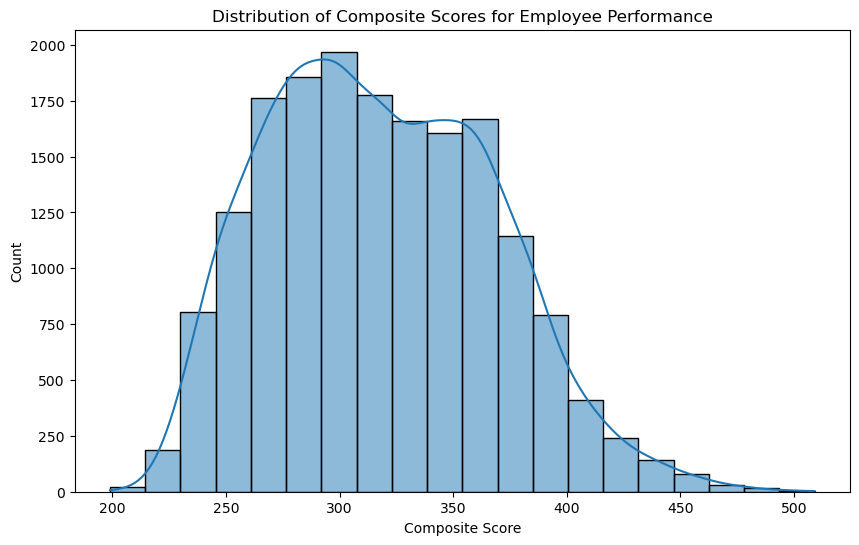

       employee_id  composite_score
12966        38595            509.0
4050         30927            508.0
8698         68240            499.0
6406         19034            498.0
1297         14194            495.0
17157        73652            493.0
4480         63689            493.0
10239        73414            492.0
13615        19102            490.0
15931        29007            488.0


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
emp = pd.read_csv("/kaggle/input/employees-performance-for-hr-analytics/Uncleaned_employees_final_dataset (1).csv")

# Define the weights for each column
weights = {
    'recruitment_channel': 5,
    'no_of_trainings': -2,
    'age': 3,
    'previous_year_rating': 4,
    'length_of_service': 2,
    'KPIs_met_more_than_80': 5,
    'awards_won': 4,
    'avg_training_score': 3
}

# Handling missing values by filling NaN in 'previous_year_rating' with the mean
emp['previous_year_rating'].fillna(emp['previous_year_rating'].mean(), inplace=True)

# Convert categorical variables to dummy variables
categorical_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']
emp_encoded = pd.get_dummies(emp, columns=categorical_columns, drop_first=True)

# Calculate the composite score for each employee
emp_encoded['composite_score'] = emp_encoded.apply(lambda row: sum(weights[col] * row[col] for col in weights.keys() if col in row), axis=1)

# Sort employees based on composite score in descending order (highest to lowest)
emp_ranked = emp_encoded.sort_values(by='composite_score', ascending=False)

# Visualize the distribution of composite scores
plt.figure(figsize=(10, 6))
sns.histplot(emp_ranked['composite_score'], bins=20, kde=True)
plt.xlabel('Composite Score')
plt.ylabel('Count')
plt.title('Distribution of Composite Scores for Employee Performance')
plt.show()

# Display the ranked employees
print(emp_ranked[['employee_id', 'composite_score']].head(10))


# **perform a prediction study on employee performance using machine learning models**

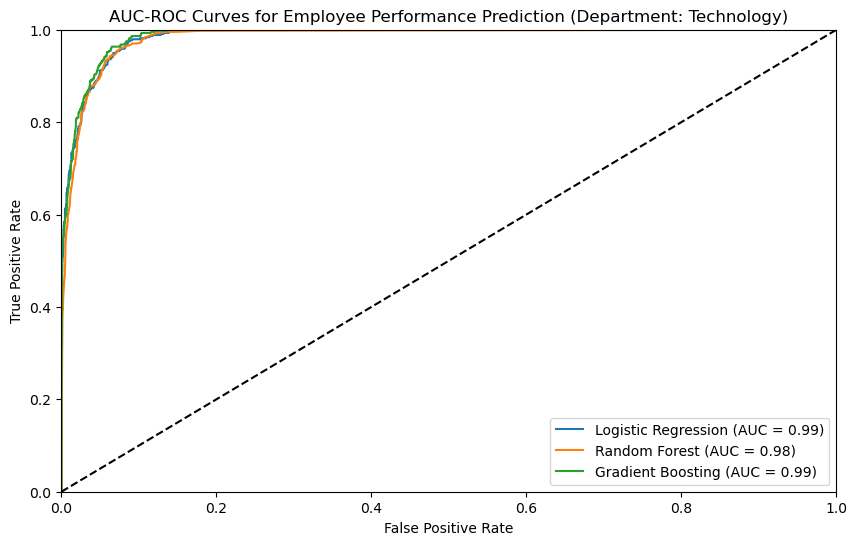

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Read the dataset
emp = pd.read_csv("/kaggle/input/employees-performance-for-hr-analytics/Uncleaned_employees_final_dataset (1).csv")

# Drop irrelevant columns and missing target values
emp = emp.drop(columns=['employee_id'])
emp = emp.dropna(subset=['department'])

# Convert gender and education to numerical values
emp['gender'] = emp['gender'].map({'m': 0, 'f': 1})
emp['education'] = emp['education'].map({'Below Secondary': 0, 'Bachelors': 1, 'Masters': 2})

# One-hot encode the "department" column
emp = pd.get_dummies(emp, columns=['department'], drop_first=True)

# Drop any non-numeric columns
emp = emp.select_dtypes(include='number')

# Define features and target variables
X = emp.drop(columns=['department_Technology'])
y = emp['department_Technology']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the features to improve convergence for logistic regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

# Make predictions on the test data
log_reg_preds = log_reg.predict_proba(X_test)[:, 1]
random_forest_preds = random_forest.predict_proba(X_test)[:, 1]
gradient_boosting_preds = gradient_boosting.predict_proba(X_test)[:, 1]

# Create a dictionary to store AUC-ROC scores and fpr-tpr pairs for each model
model_results = {}

# Evaluate and store results for Logistic Regression
log_reg_auc = roc_auc_score(y_test, log_reg_preds)
fpr, tpr, _ = roc_curve(y_test, log_reg_preds)
model_results['Logistic Regression'] = (log_reg_auc, fpr, tpr)

# Evaluate and store results for Random Forest
random_forest_auc = roc_auc_score(y_test, random_forest_preds)
fpr, tpr, _ = roc_curve(y_test, random_forest_preds)
model_results['Random Forest'] = (random_forest_auc, fpr, tpr)

# Evaluate and store results for Gradient Boosting
gradient_boosting_auc = roc_auc_score(y_test, gradient_boosting_preds)
fpr, tpr, _ = roc_curve(y_test, gradient_boosting_preds)
model_results['Gradient Boosting'] = (gradient_boosting_auc, fpr, tpr)

# Visualize the AUC-ROC curves for each model
plt.figure(figsize=(10, 6))
for model, (auc_score, fpr, tpr) in model_results.items():
    plt.plot(fpr, tpr, label=f'{model} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curves for Employee Performance Prediction (Department: Technology)')
plt.legend(loc='lower right')
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Distribution:
1    7284
4    5195
3    3335
2    1286
0     317
Name: cluster, dtype: int64


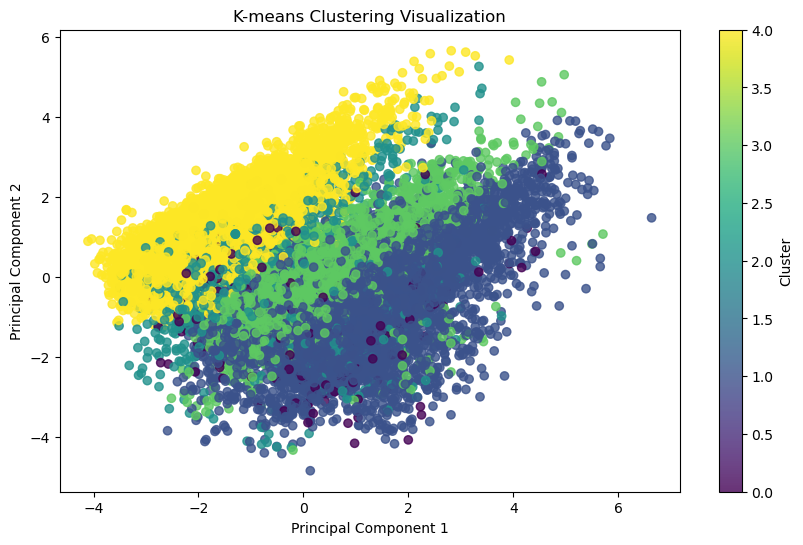

In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Prepare the data for clustering (exclude the 'department_Technology' target variable)
X_for_clustering = emp_encoded.drop(columns=['department_Technology'])

# Standardize the data for clustering
scaler = StandardScaler()
X_for_clustering_scaled = scaler.fit_transform(X_for_clustering)

# Perform K-means clustering
num_clusters = 5  # You can choose the number of clusters based on domain knowledge or use techniques like the Elbow method
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_for_clustering_scaled)

# Add the cluster labels to the dataset
emp_encoded['cluster'] = clusters

# Explore the cluster distribution
cluster_counts = emp_encoded['cluster'].value_counts()
print("Cluster Distribution:")
print(cluster_counts)

# Visualize the clusters based on the first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_for_clustering_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Visualization')
plt.colorbar(label='Cluster')
plt.show()
